[2026-01-30 Fiddler](https://thefiddler.substack.com/p/can-you-hop-in-a-spiral)
====================

Fiddler
-------
Using code, the answer is 64.

In [1]:
def lily_pads():
    result = line([(-14,0),(66,0)],color="black",axes=False)
    for i in [-13..65]:
        for j in [-17..2]:
            result += circle((i,j*sqrt(3)),1/2,color="#4c4" if j != 0 else "#8f8",fill=True)
            result += circle((i+1/2,(j+1/2)*sqrt(3)),1/2,color="#4c4",fill=True)
    for i in [-13..65]:
        for j in [-17..2]:
            result += circle((i,j*sqrt(3)),1/2,color="#080",fill=False)
            result += circle((i+1/2,(j+1/2)*sqrt(3)),1/2,color="#080",fill=False)
    result += circle((0,0),1/2,color="red",alpha=0.2,fill=True)
    result += circle((1,0),1/2,color="red",alpha=0.2,fill=True)
    x = 2
    y = 0
    dx = 1
    dy = 1
    for i in range(200):
        r2 = x^2/4 + y^2*3/4
        if x > 2 and y == 0:
            print(sqrt(x^2/4+y^2*3/4))
            break
        elif dx == 1 and dy == 1 and (x-1)^2/4 + (y+1)^2*3/4 > r2:
            dx = -1
        elif dx == -1 and dy == 1 and (x-1)^2/4 + y^2*3/4 > r2:
            dx = -2
            dy = 0
        elif dx == -2 and dy == 0 and (x-1)^2/4 + (y-1)^2*3/4 > r2:
            dx = -1
            dy = -1
        elif dx == -1 and dy == -1 and (x+1)^2/4 + (y-1)^2*3/4 > r2:
            dx = 1
        elif dx == 1 and dy == -1 and (x+2)^2/4 + y^2*3/4 > r2:
            dx = 2
            dy = 0
        elif dx == 2 and dy == 0 and (x+1)^2/4 + (y+1)^2*3/4 > r2:
            dx = 1
            dy = 1
        x += dx
        y += dy
        result += circle((x/2,y*sqrt(3)/2),1/2,color="red",alpha=0.2,fill=True)
    return result

64


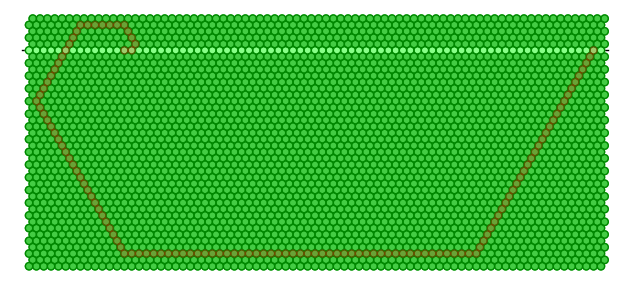

In [2]:
lily_pads()

Extra credit
------------
The first second adds 6 pads that have seen food, the second second adds 12 pads
that have seen food, the third second adds 18 pads that have seen food, the
fourth second adds 24 pads that have seen food, etc.  These form hexagonal rings
of pads, which we can call $P_{n,i}$, where $0 \le i < 6n$, where $n$ is the first
time the pad sees any food and $i$ enumerates that cohort of pads.  Let $i = 0$
correspond to a vertex of the hexagonal ring, and let increasing $i$ correspond
to going around the ring from the $i = 0$ pad.  Due to symmetry, going around
clockwise and counter-clockwise are equivalent.

Since there is a 12-way radial symmetry, only $0 \le i \le n/2$ are distinct.

The $P_{n,0}$ pads are adjacent to $P_{n-1,0}$, $P_{n,1}$, $P_{n,-1} = P_{n,1}$,
$P_{n+1,0}$, $P_{n+1,1}$, and $P_{n+1,-1} = P_{n+1,1}$.

The $P_{n,i}$ pads, where $i \ne 0$, are adjacent to $P_{n-1,i-1}$, $P_{n-1,i}$,
$P_{n,i-1}$, $P_{n,i+1}$, $P_{n+1,i}$, and $P_{n+1,i+1}$.

Then, at time $t$, the amount of food on a pad is one sixth the sum of the amount
of food on its six adjacent pads at time $t-1$.

Putting this into code,

In [3]:
import functools
#@functools.cache
def p(n,i,t):
    if n == 0:
        if t == 0:
            return 1
        return p(1,0,t-1)
    if t < n:
        return 0
    if i == 0:
        return (p(n-1,0,t-1)
                + 2*p(n,canonical_i(n,1),t-1)
                + p(n+1,0,t-1)
                + 2*p(n+1,canonical_i(n+1,1),t-1)
               )/6
    result = (p(n-1,canonical_i(n-1,i-1),t-1)
            + p(n-1,canonical_i(n-1,i),t-1)
            + p(n,canonical_i(n,i-1),t-1)
            + p(n,canonical_i(n,i+1),t-1)
            + p(n+1,canonical_i(n+1,i),t-1)
            + p(n+1,canonical_i(n+1,i+1),t-1)
           )/6
    if n == 2 and i == 1 and t == 4:
        print(n,i,t,result,canonical_i(n+1,i),n+1,"i=",i,"i+1=",i+1,canonical_i(n+1,i+1))
    return result

def canonical_i(n,i):
    return min(mod(i,n), n-mod(i,n))

What the fuck?  How does `i+1` become `0` the second time this was evaluated?

In [4]:
p(2,1,4), p(2,0,5)

2 1 4 1/27 1 3 i= 1 i+1= 2 1
2 1 4 23/648 1 3 i= 1 i+1= 0 0


(1/27, 49/1944)

Something weird is going on with this code.  I'll just run a [reimplementation](20260130.hs),

    $ runghc 20260130.hs
    (0,1 % 1,True)
    (1,0 % 1,False)
    (2,1 % 6,True)
    (3,1 % 18,True)
    (4,5 % 72,True)
    (5,5 % 108,True)
    (6,85 % 1944,True)
    (7,35 % 972,True)
    (8,1015 % 31104,True)
    (9,6055 % 209952,True)
    (10,14707 % 559872,True)
    (11,120505 % 5038848,True)
    (12,333179 % 15116544,True)
    (13,77077 % 3779136,True)
    (14,861575 % 45349632,True)
    (15,3626623 % 204073344,True)
    (16,872303575 % 52242776064,True)
    (17,11423269 % 725594112,True)
    (18,126049117337 % 8463329722368,True)
    (19,39863185505 % 2821109907456,True)
    (20,1365136910995 % 101559956668416,True)
    (21,216947654495 % 16926659444736,True)
    (22,414624859285 % 33853318889472,True)
    (23,148871996845 % 12694994583552,True)
    (24,41126150248495 % 3656158440062976,True)
    (25,9878551800715 % 914039610015744,True)
    (26,76047678184375 % 7312316880125952,True)
    (27,53423716326923605 % 5330679005611819008,True)
    (28,11455554110474605 % 1184595334580404224,False)
    (29,149409672837450725 % 15992037016835457024,False)
    (30,27096150094238255 % 2998506940656648192,False)
    (31,839560051727126525 % 95952222101012742144,False)
    (32,1249898194134585957335 % 147382613147155571933184,False)
    (33,682087030602755340005 % 82902719895275009212416,False)
    (34,21194306144173302610525 % 2652887036648800294797312,False)
    (35,20597445167964194591935 % 2652887036648800294797312,False)
    (36,2163593821436624879511125 % 286511799958070431838109696,False)
    (37,350985329342811803289605 % 47751966659678405306351616,False)
    (38,6153676619323260176582905 % 859535399874211295514329088,False)
    (39,8996882020014827890842775 % 1289303099811316943271493632,False)
    (40,280793052491634917926801915 % 41257699193962142184687796224,False)
    (41,205521218697222169799753375 % 30943274395471606638515847168,False)
    (42,14449416181086497233221829885 % 2227915756473955677973140996096,False)
    (43,14117305369147425195518693695 % 2227915756473955677973140996096,False)
    (44,575004874538638713807935725 % 92829823186414819915547541504,False)
    (45,546623132771231417198351905895 % 90230588137195204957912210341888,False)
    (46,356579761636525487375649655675 % 60153725424796803305274806894592,False)
    (47,3141665536681610461048529362145 % 541383528823171229747473262051328,False)
    (48,98460744660752731486304783292055 % 17324272922341479351919144385642496,False)
    (49,12058989254169390884059930246375 % 2165534115292684918989893048205312,False)
    (50,567370998422557609704960914191331 % 103945637534048876111514866313854976,False)
    (51,5007199443190250681629237118708825 % 935510737806439885003633796824694784,False)
    (52,19647343760855066604510571045227311 % 3742042951225759540014535187298779136,False)
    (53,9640073575308472444695338700134681 % 1871021475612879770007267593649389568,False)
    (54,13797362595990106173166566874182961135 % 2727949311443578704670596151540809990144,False)
    (55,376355244181186748593855350224010355 % 75776369762321630685294337542800277504,False)
    (56,319416303426665226106847675727164925565 % 65470783474645888912094307636979439763456,False)
    (57,235396354330298281405883048310023958955 % 49103087605984416684070730727734579822592,False)
    (58,1850983062094310601256758446735855069455 % 392824700847875333472565845821876638580736,False)
    (59,5459631224390406736474656174221717702495 % 1178474102543626000417697537465629915742208,False)
    (60,96649158993820266281766633071167221940969 % 21212533845785268007518555674381338483359744,False)
    (61,47538884202932097447409717416392710648295 % 10606266922892634003759277837190669241679872,False)
    (62,11694581965605701657501799438120957753173 % 2651566730723158500939819459297667310419968,False)
    (63,276250338068083027610733341535206192883379 % 63637601537355804022555667023144015450079232,False)
    (64,185663307003704840873664905543086965094561525 % 43443269316168228879398002021132981213920755712,False)
    (65,51420649456920473270087836886298458112040223 % 12218419495172314372330688068443650966415212544,False)
    (66,9724313405281268524661599698458809966174859725 % 2345936543073084359487492109141180985551720808448,False)
    (67,9580260178102377645146833597193671053683656751 % 2345936543073084359487492109141180985551720808448,False)
    (68,113284949118156288095923751591216876805075847609 % 28151238516877012313849905309694171826620649701376,False)
    (69,502447786831459631320416388113493907080548643835 % 126680573325946555412324573893623773219792923656192,False)
    (70,990642703450962640525010051245309219535385080395 % 253361146651893110824649147787247546439585847312384,False)
    (71,162798079184634638821108178769690458316058419755 % 42226857775315518470774857964541257739930974552064,False)
    (72,1248458048260043044199677984599270428190095922147085 % 328356046060853471628745295532272820185703258116849664,False)
    (73,102622773743810466988427797111599110436471764724085 % 27363003838404455969062107961022735015475271509737472,False)
    (74,7289666678907196868363757734288325626470396877770555 % 1970136276365120829772471773193636921114219548701097984,False)
    (75,7193120513369422800884872176393166762235332568457353 % 1970136276365120829772471773193636921114219548701097984,False)
    (76,7099098210689182309320292825274797485882370803721975 % 1970136276365120829772471773193636921114219548701097984,False)
    (77,2627813281535790831247468580940496877982691219095883 % 738801103636920311164676914947613845417832330762911744,False)
    (78,186792464442322289816477657849713688657957289006451517 % 53193679461858262403856737876228196870083927814929645568,False)
    (79,46110749741869155181316409767247760542128915783401235 % 13298419865464565600964184469057049217520981953732411392,False)
    (80,23315443291839603297722679966568868390118591569301315755 % 6808790971117857587693662448157209199370742760310994632704,False)
    (81,18886969241312688744411066216223760410885452642498504430765 % 5584059695188032954107264915294931194633930406300054473146368,False)
    (82,11056620806407723788333927031456899034103131883431853195615 % 3309072411963278787619119949804403670894180981511143391494144,False)
    (83,884861219175775321770538978639427805356814939378947201278805 % 268034865369025581797148715934156697342428659502402614711025664,False)
    (84,10492679791907748122884372254734900678158298919158240130986765 % 3216418384428306981565784591209880368109143914028831376532307968,False)
    (85,5184982021791894738436164554327362461899247416017272803556563 % 1608209192214153490782892295604940184054571957014415688266153984,False)
    (86,30750256382078951554664336373440430175413313952936307759537755 % 9649255153284920944697353773629641104327431742086494129596923904,False)
    (87,17099347687319165124829392109390381203941462589498360736869617 % 5427706023722768031392261497666673121184180354923652947898269696,False)
    (88,270498288365633288867362795729343188546650395478514866921677369 % 86843296379564288502276183962666769938946885678778447166372315136,False)
    (89,33434511014047004110484842110937640513289296397649895169376075 % 10855412047445536062784522995333346242368360709847305895796539392,False)
    (90,14284116324166884853328902540410356710479957559464321007398500101 % 4689538004496471579122913933984005576703131826654036146984105017344,False)
    (91,4709337345905693869829778029552945101700053927269355970800756025 % 1563179334832157193040971311328001858901043942218012048994701672448,False)
    (92,83851696671792382492856271610901544423380820231048021587023370641 % 28137228026978829474737483603904033460218790959924216881904630104064,False)
    (93,124432382391406627193505638274556822202107237534201131026591529193 % 42205842040468244212106225405856050190328186439886325322856945156096,False)
    (94,61557843602912675270362025906663888635805026911124384913970105205 % 21102921020234122106053112702928025095164093219943162661428472578048,False)
    (95,730959391517685287920748293795313609636625892490993794641329035565 % 253235052242809465272637352435136301141969118639317951937141670936576,False)
    (96,3333357878996218986498840513410900934208805965374953629355462042776645 % 1166907120734866015976312920021108075662193698689977122526348819675742208,False)
    (97,206198175159692581166365609549394490462292908156718036211960487663205 % 72931695045929125998519557501319254728887106168123570157896801229733888,False)
    (98,725706187473426022063729953152363078637781368042533079180211831974455 % 259312693496636892439180648893579572369376377486661582783633071039053824,False)
    (99,523723008230293023560143206744781443141671944931677526640442633762871765 % 189038953559048294588162693043419508257275379187776293849268508787470237696,False)
    (100,691349343319739039775434463320350620033193785867689573717148160446966335 % 252051938078731059450883590724559344343033838917035058465691345049960316928,False)

and the amount of food on pad A is first less than 1% at $N = 28$.

In [5]:
pt = [(0,1/1),
(1,0/1),
(2,1/6),
(3,1/18),
(4,5/72),
(5,5/108),
(6,85/1944),
(7,35/972),
(8,1015/31104),
(9,6055/209952),
(10,14707/559872),
(11,120505/5038848),
(12,333179/15116544),
(13,77077/3779136),
(14,861575/45349632),
(15,3626623/204073344),
(16,872303575/52242776064),
(17,11423269/725594112),
(18,126049117337/8463329722368),
(19,39863185505/2821109907456),
(20,1365136910995/101559956668416),
(21,216947654495/16926659444736),
(22,414624859285/33853318889472),
(23,148871996845/12694994583552),
(24,41126150248495/3656158440062976),
(25,9878551800715/914039610015744),
(26,76047678184375/7312316880125952),
(27,53423716326923605/5330679005611819008),
(28,11455554110474605/1184595334580404224),
(29,149409672837450725/15992037016835457024),
(30,27096150094238255/2998506940656648192),
(31,839560051727126525/95952222101012742144),
(32,1249898194134585957335/147382613147155571933184),
(33,682087030602755340005/82902719895275009212416),
(34,21194306144173302610525/2652887036648800294797312),
(35,20597445167964194591935/2652887036648800294797312),
(36,2163593821436624879511125/286511799958070431838109696),
(37,350985329342811803289605/47751966659678405306351616),
(38,6153676619323260176582905/859535399874211295514329088),
(39,8996882020014827890842775/1289303099811316943271493632),
(40,280793052491634917926801915/41257699193962142184687796224),
(41,205521218697222169799753375/30943274395471606638515847168),
(42,14449416181086497233221829885/2227915756473955677973140996096),
(43,14117305369147425195518693695/2227915756473955677973140996096),
(44,575004874538638713807935725/92829823186414819915547541504),
(45,546623132771231417198351905895/90230588137195204957912210341888),
(46,356579761636525487375649655675/60153725424796803305274806894592),
(47,3141665536681610461048529362145/541383528823171229747473262051328),
(48,98460744660752731486304783292055/17324272922341479351919144385642496),
(49,12058989254169390884059930246375/2165534115292684918989893048205312),
(50,567370998422557609704960914191331/103945637534048876111514866313854976),
(51,5007199443190250681629237118708825/935510737806439885003633796824694784),
(52,19647343760855066604510571045227311/3742042951225759540014535187298779136),
(53,9640073575308472444695338700134681/1871021475612879770007267593649389568),
(54,13797362595990106173166566874182961135/2727949311443578704670596151540809990144),
(55,376355244181186748593855350224010355/75776369762321630685294337542800277504),
(56,319416303426665226106847675727164925565/65470783474645888912094307636979439763456),
(57,235396354330298281405883048310023958955/49103087605984416684070730727734579822592),
(58,1850983062094310601256758446735855069455/392824700847875333472565845821876638580736),
(59,5459631224390406736474656174221717702495/1178474102543626000417697537465629915742208),
(60,96649158993820266281766633071167221940969/21212533845785268007518555674381338483359744),
(61,47538884202932097447409717416392710648295/10606266922892634003759277837190669241679872),
(62,11694581965605701657501799438120957753173/2651566730723158500939819459297667310419968),
(63,276250338068083027610733341535206192883379/63637601537355804022555667023144015450079232),
(64,185663307003704840873664905543086965094561525/43443269316168228879398002021132981213920755712),
(65,51420649456920473270087836886298458112040223/12218419495172314372330688068443650966415212544),
(66,9724313405281268524661599698458809966174859725/2345936543073084359487492109141180985551720808448),
(67,9580260178102377645146833597193671053683656751/2345936543073084359487492109141180985551720808448),
(68,113284949118156288095923751591216876805075847609/28151238516877012313849905309694171826620649701376),
(69,502447786831459631320416388113493907080548643835/126680573325946555412324573893623773219792923656192),
(70,990642703450962640525010051245309219535385080395/253361146651893110824649147787247546439585847312384),
(71,162798079184634638821108178769690458316058419755/42226857775315518470774857964541257739930974552064),
(72,1248458048260043044199677984599270428190095922147085/328356046060853471628745295532272820185703258116849664),
(73,102622773743810466988427797111599110436471764724085/27363003838404455969062107961022735015475271509737472),
(74,7289666678907196868363757734288325626470396877770555/1970136276365120829772471773193636921114219548701097984),
(75,7193120513369422800884872176393166762235332568457353/1970136276365120829772471773193636921114219548701097984),
(76,7099098210689182309320292825274797485882370803721975/1970136276365120829772471773193636921114219548701097984),
(77,2627813281535790831247468580940496877982691219095883/738801103636920311164676914947613845417832330762911744),
(78,186792464442322289816477657849713688657957289006451517/53193679461858262403856737876228196870083927814929645568),
(79,46110749741869155181316409767247760542128915783401235/13298419865464565600964184469057049217520981953732411392),
(80,23315443291839603297722679966568868390118591569301315755/6808790971117857587693662448157209199370742760310994632704),
(81,18886969241312688744411066216223760410885452642498504430765/5584059695188032954107264915294931194633930406300054473146368),
(82,11056620806407723788333927031456899034103131883431853195615/3309072411963278787619119949804403670894180981511143391494144),
(83,884861219175775321770538978639427805356814939378947201278805/268034865369025581797148715934156697342428659502402614711025664),
(84,10492679791907748122884372254734900678158298919158240130986765/3216418384428306981565784591209880368109143914028831376532307968),
(85,5184982021791894738436164554327362461899247416017272803556563/1608209192214153490782892295604940184054571957014415688266153984),
(86,30750256382078951554664336373440430175413313952936307759537755/9649255153284920944697353773629641104327431742086494129596923904),
(87,17099347687319165124829392109390381203941462589498360736869617/5427706023722768031392261497666673121184180354923652947898269696),
(88,270498288365633288867362795729343188546650395478514866921677369/86843296379564288502276183962666769938946885678778447166372315136),
(89,33434511014047004110484842110937640513289296397649895169376075/10855412047445536062784522995333346242368360709847305895796539392),
(90,14284116324166884853328902540410356710479957559464321007398500101/4689538004496471579122913933984005576703131826654036146984105017344),
(91,4709337345905693869829778029552945101700053927269355970800756025/1563179334832157193040971311328001858901043942218012048994701672448),
(92,83851696671792382492856271610901544423380820231048021587023370641/28137228026978829474737483603904033460218790959924216881904630104064),
(93,124432382391406627193505638274556822202107237534201131026591529193/42205842040468244212106225405856050190328186439886325322856945156096),
(94,61557843602912675270362025906663888635805026911124384913970105205/21102921020234122106053112702928025095164093219943162661428472578048),
(95,730959391517685287920748293795313609636625892490993794641329035565/253235052242809465272637352435136301141969118639317951937141670936576),
(96,3333357878996218986498840513410900934208805965374953629355462042776645/1166907120734866015976312920021108075662193698689977122526348819675742208),
(97,206198175159692581166365609549394490462292908156718036211960487663205/72931695045929125998519557501319254728887106168123570157896801229733888),
(98,725706187473426022063729953152363078637781368042533079180211831974455/259312693496636892439180648893579572369376377486661582783633071039053824),
(99,523723008230293023560143206744781443141671944931677526640442633762871765/189038953559048294588162693043419508257275379187776293849268508787470237696),
(100,691349343319739039775434463320350620033193785867689573717148160446966335/252051938078731059450883590724559344343033838917035058465691345049960316928)]

Further thoughts
----------------
This is essentially a diffusion process, so, in the limit of the radius of the lily pads
going to zero, I'd expect to get some sort of diffusion equation.

$$ f(x,y,t+\Delta t) = \frac16\left(
        f(x+2r,y,t) +
        f(x+r,y+r\sqrt3,t) +
        f(x-r,y+r\sqrt3,t) +
        f(x-2r,y,t) +
        f(x-r,y-r\sqrt3,t) +
        f(x+r,y-r\sqrt3,t)
    \right) $$

When $r$ and $\Delta t$ are small, and assuming $D = r^2/\Delta t$ is a constant,

$$ \frac{\partial f}{\partial t} = D\left(\frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}\right) $$

and the hexagonal anisotropy is lost.  I assume that higher order terms will effectively cause
$D$ to be $r^2/\Delta t$ in the six hexagonal vertex directions, while $D$ will be $3r^2/4\Delta t$
in the directions between them, recovering the hexagonal nature of the process.

Assuming a Gaussian solution,

$$ f(x,y,t) = \frac{e^{-\frac{x^2+y^2}{2\sigma^2+4Dt}}}{2\sigma^2+4Dt} $$

So, if $r = 1/2$ and $\Delta t = 1$, then $D = 1/4$.

In [6]:
s,D = var("s,D")
f(x,y,t) = 1/(2*s^2+4*D*t)*e^(-(x^2+y^2)/((2*s^2+4*D*t)))

And it looks like $\sigma \approx 0.376$ when $f(0,0,28) = 1/100\cdot f(0,0,0)$.

In [7]:
solve((f(0,0,28) == f(0,0,0)/100).substitute(D == 1/4), s)

[s == -1/33*sqrt(14)*sqrt(11), s == 1/33*sqrt(14)*sqrt(11)]

In [8]:
numerical_approx(sqrt(14*11)/33)

0.376050716545178

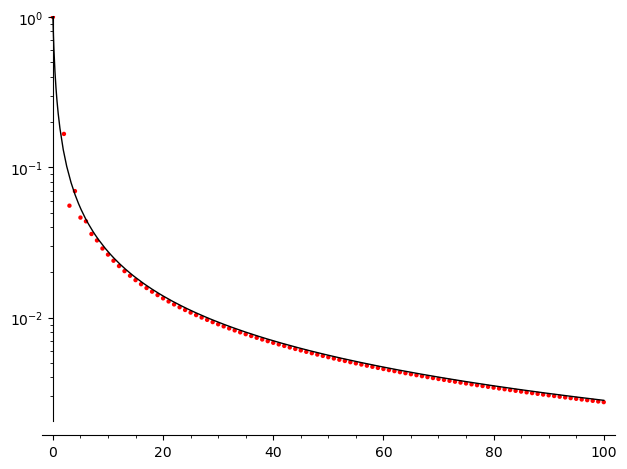

In [9]:
(plot((f(0,0,t)/f(0,0,0)).substitute(D == 1/4, s == 0.376), t, 0, 100, color="black", scale="semilogy")
 + points(pt, color="red"))

So the Gaussian solution to the isotropic diffusion equation captures the decay of
the amount of food at lily pad A pretty well.